In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, \
    array, cumsum, dot, transpose, diagonal, floor

In [2]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
sns.set_style("whitegrid")
outdir = './comparison_figures/'
!mkdir $outdir

# define system directories 
WT_apo_dir = "./hiapp_wt_apo/outdir_wt_hiapp_apo/"
S20G_apo_dir = "./hiapp_s20g_apo/outdir_s20g_hiapp_apo/"

# WT_A_outdir = "./outdir_wt_IAPP_YX-A-1/"
# WT_I_outdir = "./outdir_wt_IAPP_YX-I-1/"
# S20G_A_outdir = "./outdir_s20g_IAPP_YX-A-1/"
# S20G_I_outdir = "./outdir_s20g_IAPP_YX-I-1/"

# define the sequences to plot 
sequence_ol_both = ['K', 'C', 'N', 'T', 'A', 'T', 'C', 'A', 'T', 'Q', 'R', 'L', 'A', 'N', 'F', 'L', 'V', 'H', 'S', 'X', 'N', 'N', 'F', 'G', 'A', 'I', 'L', 'S', 'S', 'T', 'N', 'V', 'G', 'S', 'N', 'T', 'Y', '      NH$_2$']
sequence_ol_wt = ['K', 'C', 'N', 'T', 'A', 'T', 'C', 'A', 'T', 'Q', 'R', 'L', 'A', 'N', 'F', 'L', 'V', 'H', 'S', 'S', 'N', 'N', 'F', 'G', 'A', 'I', 'L', 'S', 'S', 'T', 'N', 'V', 'G', 'S', 'N', 'T', 'Y', '      NH$_2$']
sequence_ol_s20g= ['K', 'C', 'N', 'T', 'A', 'T', 'C', 'A', 'T', 'Q', 'R', 'L', 'A', 'N', 'F', 'L', 'V', 'H', 'S', 'G', 'N', 'N', 'F', 'G', 'A', 'I', 'L', 'S', 'S', 'T', 'N', 'V', 'G', 'S', 'N', 'T', 'Y', '      NH$_2$']

In [4]:
colors = {
    "WT Apo": "tab:red",
    "WT + YX-A-1":"tab:green",
    "WT + YX-I-1":"tab:orange", 
    "S20G + YX-A-1" : "tab:green",
    "S20G + YX-I-1" : "tab:orange",
    "S20G Apo" : "tab:blue",    
}

Figure 1

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]


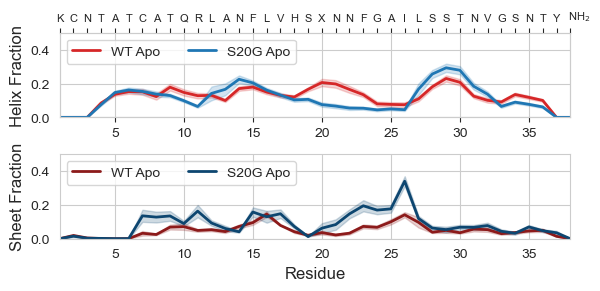

In [21]:

files = ['Hprop.err.dat','Eprop.err.dat']
all_dirs = [ WT_apo_dir, S20G_apo_dir]

labels = [
    "WT Apo",
    "S20G Apo",
]

fig, axes = plt.subplots(2, 1, figsize=(6,3.0))

colors = [["tab:red", "tab:blue"], ["#8C1A1A","#0D4670" ]]
for n, file in enumerate(files):
    count = 0 
    for directory in all_dirs: 
        attr = np.loadtxt(directory+file) # attr = attribute 
        upper = attr[:,1] + attr[:,2]
        lower = attr[:,1] - attr[:,2]

        label = labels[count]
        linest = "-"

        sns.lineplot(x=attr[:, 0], y=attr[:, 1],
                    color=colors[n][count], linewidth=2, linestyle=linest, label=label , ax=axes[n])
        axes[n].fill_between(attr[:, 0], upper, lower, color=colors[n][count], alpha=0.2)
        #plt.errorbar(attr[:, 0], attr[:, 1], attr[:,2], color=colors[label], alpha=0.5, linestyle="none")
        
        axes[n].set_xlim(1, 38)
        axes[n].set_ylim(0.0, 0.5)
        
        count += 1

axes[1].set_xlabel('Residue', fontsize=12)
axes[0].set_ylabel('Helix Fraction', fontsize=12)
axes[1].set_ylabel('Sheet Fraction', fontsize=12)

axes[0].legend(loc='upper left', fontsize=10, ncol = 2)
axes[1].legend(loc='upper left', fontsize=10, ncol = 2)

ax2 = axes[0].twiny()
top_ticks = np.arange(0, 38, 1)
print(top_ticks)
plt.grid(True)
plt.tight_layout()
ax2.set_xticks(top_ticks)
ax2.set_xticklabels([f'{i}' for i in sequence_ol_both[0::1]], fontsize=8)
ax2.grid(False)
plt.savefig(outdir+'Hprop.Eprop.wt.s20g.apo.pdf', dpi=300, bbox_inches='tight')

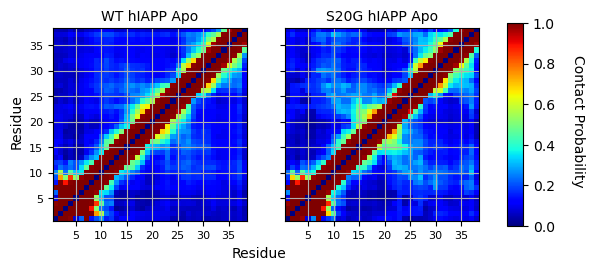

In [22]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
sns.reset_defaults()
file = "contactmap.dat"
fig, axs = plt.subplots(1,2, figsize=(5.5, 7.0),sharey=True,sharex=True)

all_dirs = [WT_apo_dir, S20G_apo_dir]

labels = [
    "WT hIAPP Apo",
    "S20G hIAPP Apo",
]
# known from computed plots, next time load in

count = 0 
for directory in all_dirs: 
    attr = np.loadtxt(directory+file) # attr = attribute 
    label = labels[count]
    #_map = make_c_map(trj)
    im = axs[count].imshow(attr, vmax=1.0, vmin=0.0, cmap = "jet")
    axs[count].set_title(label,size=10,pad=5)
    
    #imaxes = plt.gca()
    count += 1

# Add the colorbar below the subplots
#cax = fig.add_axes([0.15, -0.25, 0.7, 0.05])  # [left, bottom, width, height]
# cax = fig.add_axes([0.97, 0.2, 0.02, 0.6])
# fig.colorbar(im, cax=cax, orientation='vertical')
# cax.tick_params(axis="x", labelsize=10)
#fig.text(0.94, 0.55, 'kcal mol$^{-1}$',rotation=90., ha='center', va='center', fontsize=12)

#cax = fig.add_axes([0.25, -0.08, .5, 0.03])  # [left, bottom, width, height]
cax = fig.add_axes([0.95, 0.35, .03, 0.29])
fig.colorbar(im, cax=cax, orientation='vertical')
cax.tick_params(axis="x", labelsize=8)

# Set y-axis tick size
for n, ax in enumerate(axs):
    # if n % 2 == 1: 
    #     ax.set_xticks(np.arange(0,38), sequence_ol_s20g)
    #     ax.set_yticks(np.arange(0,38), sequence_ol_s20g)
    # else: 
    #     ax.set_xticks(np.arange(0,38), sequence_ol_wt)
    #     ax.set_yticks(np.arange(0,38), sequence_ol_wt)
    # offset by 1 for the numbering 
    ax.set_xticks(np.arange(0, 38, 5)-1, np.arange(0,38,5) )
    ax.set_yticks(np.arange(0, 38, 5)-1, np.arange(0,38,5) )
    ax.set_xlim(-0.5,37.5)
    ax.set_ylim(-0.5,37.5)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.grid(True)

# Set x-axis tick size
# for ax in axs:
#     ax.set_xticks(np.arange(0,38, 5) - 0.5, labels = np.arange(1,39,5))
#     ax.set_yticks(range(0,38, 5), labels = np.arange(0,38,5))
#     ax.tick_params(axis='x', labelsize=10)
#     ax.tick_params(axis='y', labelsize=10)
#     ax.grid(True)

fig.text(0.5, 0.31, 'Residue', ha='center', va='center', fontsize=10)
fig.text(1.08, 0.5, 'Contact Probability', ha='center', va='center', fontsize=10, rotation =270)
fig.text(0.06, 0.5, 'Residue', rotation=90, ha='center', va='center', fontsize=10)
plt.savefig('%s/contact.map.compare.s20g.wt.apo.pdf' % outdir, dpi=400,bbox_inches='tight')
plt.show()

Supplementary Figure of DSSP Bend assignments: 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]


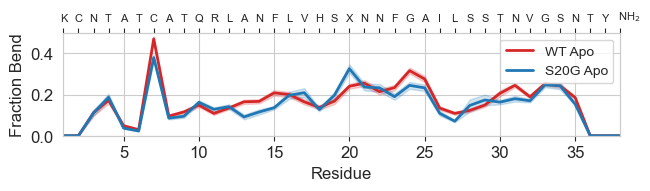

In [20]:
file = 'Sprop.err.dat'

all_dirs = [ WT_apo_dir, S20G_apo_dir]
labels = [
    "WT Apo",
    "S20G Apo",
]
fig, axes = plt.subplots(figsize=(6.5,2))
count = 0 
for directory in all_dirs: 
    attr = np.loadtxt(directory+file) # attr = attribute 
    upper = attr[:,1] + attr[:,2]
    lower = attr[:,1] - attr[:,2]
    label = labels[count]
    linest = "-"
    # if label[0] == "S" and label[-1] != "o":
    #     linest = "--"
    # else: 
    #     linest = "-"
    sns.lineplot(x=attr[:, 0], y=attr[:, 1],
                color=colors[label], label=label, linewidth=2, linestyle=linest)
    plt.fill_between(attr[:, 0], upper, lower, color=colors[label], alpha=0.2)
    #plt.errorbar(attr[:, 0], attr[:, 1], attr[:,2], color=colors[label], alpha=0.5, linestyle="none")
    count += 1

plt.ylim(0.0, 0.5)
plt.xlim(1, 38)
plt.xticks(ticks = range(0,39,5)[1:],fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Residue', fontsize=12)
plt.ylabel('Fraction Bend', fontsize=12)
plt.grid(True)
plt.tight_layout()

# set the sequence 
ax2 = axes.twiny()
top_ticks = np.arange(0, 38, 1)
print(top_ticks)
plt.grid(True)
plt.tight_layout()
ax2.set_xticks(top_ticks)
ax2.set_xticklabels([f'{i}' for i in sequence_ol_both[0::1]], fontsize=8)
ax2.grid(False)
plt.savefig(outdir+'Sprop.s20g.wt.apo.pdf', dpi=300, bbox_inches='tight')
